# number recognition : MNIST

## get the data

In [1]:
# dowload links
url_all_data = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3004/861823/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1711345199&Signature=B9UkzxpDPgQR2HiHrSK%2F7PGKJ6ceU5KdYcO29A3EgUSJq4J%2BlAvDwUIRI05ykFXyEnNjJ7GsVVOYUEcfKyz2muGTcUDaoGsGWf8zfjkSr%2BFem2yVtXA9c6O5YUyPpts1PeBk9fE2Ukzjmd4zrpuaDh4Og%2F9pBwdU77544ZwPGOhPvoEndXHVJS0CK2Ncq0%2FW0zMcvBVVpNBLFZK8k6pYlGxo%2FqY99prg3DabL027qK9nsvaDIteTjrFdoha%2B7bpXPE5YiOIVZJd2XlEhhpzHInja4WRwh3UTQexE4C5ygIOcDFWVtfnZhfKWffUowgKlxJggmmuxEG4GYAoHnzaKeg%3D%3D&response-content-disposition=attachment%3B+filename%3Ddigit-recognizer.zip'
url_train_data = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3004/861823/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1711345117&Signature=hsZqRD5fO112M7XVa9LTifW94JIAhfkXhkTlFe5sVPGhUkK56moHfLW78evYgL9zO0I%2FP878OF5%2BsWknoTNnROXR%2BHEyFrUWDghVUtF4xiaO808VN4seKQpnwwSiG4KyGExwTSzEfSNO6cTCHRZAXh8dUogffGdb5EkENQHnBt1RWEla%2Foax3Nkd6LfewdEhH%2BAUaQ3kmvgpb%2Fq0bh9RUU9BPrzRs1D2Vya2v18UdLYMPGRaZ82mSt24clqVJ65xMQ0kOvV%2FofYmxQfXtTxEH2hcya5fTTFjtDuFyvwMX5l8L97bn3%2B8HcWLC%2BnRbueGHeJ3SO9rBKzJhRtcjRSkFQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip'
url_test_data = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3004/861823/compressed/test.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1711345154&Signature=aIiZ2JXBdjfl1vHM201ubmtoL8TAOjlnKvrkTiDqvsR2lvSdUezSlD3ZnDgT5oZ5FYtna%2FKwu0H5Wzd10aHOYnkJD%2FInry%2BnjbmIH7EtgfMEPwQDAamxwLXLBXEiyA2LBGAYtMB%2Be%2Bt1VFBW6f8NXv6rdRnVs7GuD5n6S3CnUfwHQ53ebveILyv8nYR6GMqimK367ZDPeoeEPP3KZtDyEIlQc0QtUhBNLb4gBq8AO2O6tS5bVe9rfK9WXaqa1uI8EgYv2mK4jZ4X9Q3fPg2W%2BQLpbl7ma1vbLcIbn3Cvb3H%2Br0LLX9THLJk2RdXsAEs8eI2M8I6Hz3sCFvKh772wJg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest.csv.zip'
url_submission_sample_data = 'https://storage.googleapis.com/kagglesdsdata/competitions/3004/861823/sample_submission.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1711345174&Signature=BO2u5zFNxZTxcRu88Z3ycd3sUkU5Ahab7xnn2H6R%2FsCC1t56NOKbFeL8drdUEBPnTmvfz9%2BX2IMXdgMXIQvGapWBSiShAQ4KMCY7UynjR9nvr4rdr5I9GqjQ31TldWLGP7v1dLFr8WrbuYCNqcQmSmvhVsAjV%2BRh1r2VYP5G2DquqK2VKDxAv2C%2BuOTyOv6VQtBTomrXoO%2BY8ErpiUOYnai32RvRXeNT5JJFwKMeEOytwKQ5ZE5D8%2BDDdnbUk2B75aWiT%2FJOR%2Bn%2BFCJpSsng6DB2HXuRLbNconu5n9GVsffJMFp3qGjY9HsbZOHYRDaz%2BvEYSgi3QUqtAfMARt%2FiVg%3D%3D&response-content-disposition=attachment%3B+filename%3Dsample_submission.csv'

In [2]:
digit_folder = '../data_digit_recognition/'

In [3]:
def fetch_file_stream(url,filename,folder):
    import requests
    import os
    path_destination = folder+filename
    if not os.path.exists(folder):
        os.makedirs(folder)
    if not os.path.exists(path_destination):
        response = requests.get(url,stream=True)
        with open(path_destination, 'wb') as file_destination:
            for chunk in response.iter_content(chunk_size=128):
                file_destination.write(chunk)


def unzip_files(zipped_filepath,destination_folder):
    import zipfile
    with zipfile.ZipFile(zipped_filepath,"r") as zip_ref:
        zip_ref.extractall(destination_folder)

In [4]:
all_data_filename = 'all_data.zip'
fetch_file_stream(
    url=url_all_data,
    folder=digit_folder,
    filename=all_data_filename,
)
unzip_files(
    zipped_filepath=digit_folder+all_data_filename,
    destination_folder=digit_folder,
)

!ls -lha {digit_folder}

total 138M
drwxr-xr-x 1 wam wam  100 Mar 22 06:52 .
drwxr-xr-x 1 wam wam  200 Mar 22 06:50 ..
-rw-r--r-- 1 wam wam  16M Mar 22 06:51 all_data.zip
-rw-r--r-- 1 wam wam 236K Mar 24 14:20 sample_submission.csv
-rw-r--r-- 1 wam wam  49M Mar 24 14:20 test.csv
-rw-r--r-- 1 wam wam  74M Mar 24 14:20 train.csv


In [5]:
import pandas
import numpy

In [6]:
train_data_filepath = digit_folder+'train.csv'
train_data = pandas.read_csv(
    filepath_or_buffer=train_data_filepath,
    sep=',',
    low_memory=False,
    dtype=numpy.ubyte,
)

In [7]:
test_data_filepath = digit_folder+'test.csv'
test_data = pandas.read_csv(
    filepath_or_buffer=test_data_filepath,
    sep=',',
    low_memory=False,
    dtype=numpy.ubyte,
)

In [8]:
xss_test = test_data

In [9]:
del test_data

In [10]:
ys_train = train_data['label']
xss_train = train_data.drop(['label'],axis=1)

In [11]:
# del train_data

In [12]:
xss_train_normalized = (xss_train/255).astype(numpy.float16)

In [13]:
# del xss_train

In [14]:
xss_test_normalized = (xss_test/255).astype(numpy.float16)

In [15]:
# del xss_test

In [16]:
xss_train_reshaped = xss_train_normalized.values.reshape(xss_train_normalized.shape[0], 28, 28,1)
xss_train_reshaped.shape

(42000, 28, 28, 1)

In [17]:
# del xss_train_normalized

In [18]:
xss_test_reshaped = xss_test_normalized.values.reshape(xss_test_normalized.shape[0], 28, 28,1)
del xss_test_normalized

In [19]:
from tensorflow.keras.utils import to_categorical
ys_train_one_hot_encoded = to_categorical(ys_train,num_classes=10)

2024-03-24 14:20:56.818399: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-24 14:20:56.927038: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:


def baseline_model(single_input_shape, number_node_output):
    from keras.models import Model
    from keras import layers
    inputs = layers.Input(shape=single_input_shape)
    
    hidden_layer = layers.Conv2D(32, (5, 5), activation='relu')(inputs)
    hidden_layer = layers.MaxPooling2D(pool_size=(2, 2))(hidden_layer)
    hidden_layer = layers.Dropout(0.2)(hidden_layer)
    hidden_layer = layers.Flatten()(hidden_layer)
    hidden_layer = layers.Dense(128, activation='relu')(hidden_layer)
    
    outputs = layers.Dense(number_node_output, activation='softmax')(hidden_layer)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [21]:
model = baseline_model(xss_train_reshaped.shape[1:], ys_train_one_hot_encoded.shape[1:][0])

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [23]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_1')>

In [24]:
from sklearn.model_selection import train_test_split
xss_learn, xss_validation, ys_learn, ys_validation = train_test_split(
    xss_train_reshaped, 
    ys_train_one_hot_encoded, 
    test_size=0.1, 
    stratify=ys_train_one_hot_encoded, 
    random_state=42
)

In [25]:
xss_train_reshaped.shape

(42000, 28, 28, 1)

In [26]:
xss_learn.shape

(37800, 28, 28, 1)

In [27]:
ys_train_one_hot_encoded.shape

(42000, 10)

In [28]:
history = model.fit(x=xss_train_reshaped, y=ys_train_one_hot_encoded, batch_size=64, epochs=2, validation_split=0.2)

Epoch 1/2
525/525 [==============================] - 3s 6ms/step - loss: 0.2253 - val_loss: 0.0804
Epoch 2/2
525/525 [==============================] - 3s 6ms/step - loss: 0.0689 - val_loss: 0.0612


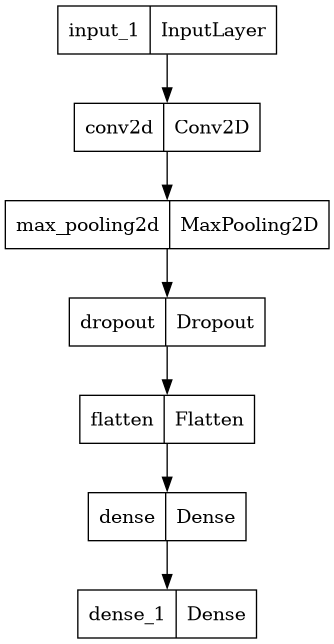

In [29]:
from tensorflow import keras
import pydot
keras.utils.plot_model(model)

In [30]:
ys_test_predicted = model.predict(xss_test_reshaped)

875/875 [==============================] - 1s 1ms/step


In [33]:
ys_test_predicted.shape

(28000, 10)

In [34]:
result = numpy.argmax(ys_test_predicted, axis=1)

In [35]:
result[:10]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3])

In [37]:
xss_test_reshaped.shape[0]

(28000, 28, 28, 1)

In [41]:
submission_sample_filepath = digit_folder+'sample_submission.csv'
submission_example_data = pandas.read_csv(
    filepath_or_buffer=submission_sample_filepath,
    sep=',',
    low_memory=False,
    dtype=numpy.ubyte,
)

In [58]:
submission_data = submission_example_data[:0]

In [68]:
submission_example_data.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [59]:
submission_data.columns

Index(['ImageId', 'Label'], dtype='object')

In [71]:
submission_data['ImageId'] = numpy.arange(1,result.shape[0]+1)

In [72]:
submission_data['Label'] = result

In [73]:
submission_data.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [74]:
submission_data.to_csv(digit_folder+'submission.csv', index = False)

In [75]:
submission_data['ImageId'].unique()

array([    1,     2,     3, ..., 27998, 27999, 28000])

In [1]:
# score after submission: 0.97707